# Running Honeycomb Floquet Codes

Note that we are using the tools in `archiver4qiskit` do deal with running Qiskit jobs and getting results. It also saves the results locally, so that they can be used by others. To use it, install the version in this folder by uncommenting the command below.

In [1]:
#pip install archiver4qiskit/

You'll also need to be using the correct version of qiskit, namely

    {'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [12]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

If this was not already installed along with `archiver4qiskit`, it can be done by uncommenting the command below.

In [2]:
#pip install qiskit==0.34.2

Now we can begin!

In [3]:
from floquet_codes import *

from matplotlib import pyplot as plt
from matplotlib import container

from archiver4qiskit import get_archive

from qiskit.visualization.timeline import draw

To define experiments, we need to set the number of rounds, whether to use dynamical decoupling, and the order in which the three colours of link operators are measured.

Note that the minimum number of rounds required to see a syndrome change for all plaquette types is 7.

In [4]:
rounds = 7
dd = True

To get the circuit that will be run for a specific backend, put the backend name below. For a simulated circuit (which won't include scheduling or dynamical decoupling) the processor type can be specified (e.g. `processor='Hummingbird'`).

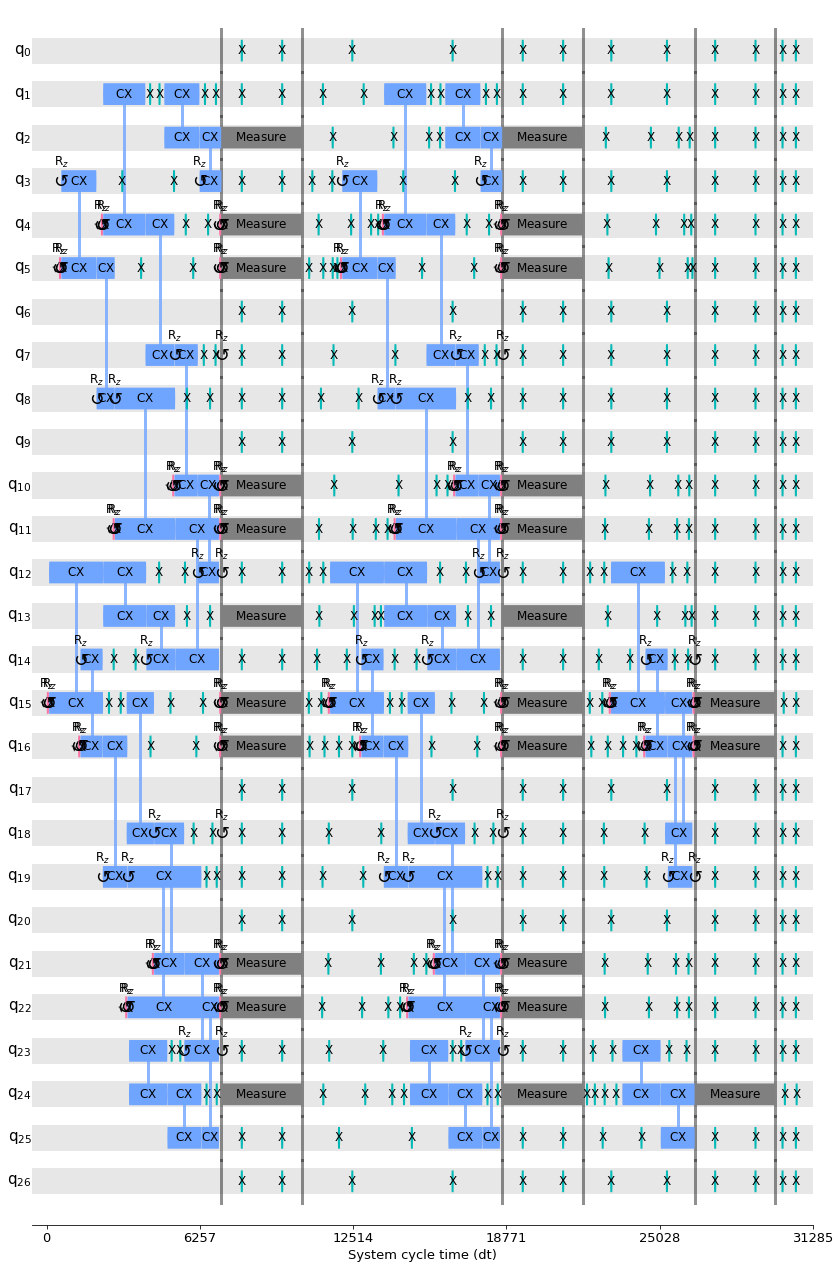

In [5]:
backend_name = 'ibm_cairo'
processor = None

order = ['red','green','blue',]

if backend_name:
    N, plaquettes, colors, links = get_params(backend_name, processor=processor)
    qc , output = get_circuit(rounds, backend_name, N, plaquettes, colors, links, order, dd)
    
if 'simulator' in backend_name:
    fig = qc.draw(output='mpl')
else:
    fig = draw(qc)
fig

To run some experiments, supply a list of names for Falcon, Hummingbird and Eagle devices. The job objects will be archived locally by [archiver4qiskit](https://github.com/NCCR-SPIN/archiver4qiskit?organization=NCCR-SPIN&organization=NCCR-SPIN), with a corresponding archive id.

In [6]:
backend_names = [] # put entries here to run something

archive_ids = []
for backend_name in backend_names:
    archive_ids.append(run_experiment(backend_name,rounds))
print(archive_ids)

[]


Here are some archive ids we made earler.

In [7]:
archive_ids = [
    '621fedd3329befa57b6d3038@ibm_hanoi',
    '621feda8d155c87d09e664b7@ibm_auckland',
    '621fed80e71dc7769152fc0d@ibmq_kolkata',
    '62261d78cd470344f2e99d46@ibm_peekskill',
    '621fee4d762eb779c481c65b@ibmq_mumbai',
    '621fee27ff4b7c0930638150@ibmq_montreal',
    '621fedfed155c80b21e664b8@ibmq_toronto',
    '621fed61e71dc72d2a52fc0c@ibm_washington',
]
#archive_ids = []

Now we can process and obtain the results. Uncomment the last line to just use the processed results that were made earlier.

In [8]:
if archive_ids:
    q_results = []
    for archive_id in archive_ids:
        w_av = get_results(archive_id)
        probs_meas, probs_prep, probs_cx, probs_idle, p_0, p_0_std = noise_details(archive_id)
        q_results.append([archive_id, p_0, np.min(w_av), np.mean(w_av), np.max(w_av)])
else:
    q_result = [['621fedd3329befa57b6d3038@ibm_hanoi', 0.013169214543115907, 0.32597900390625, 0.3512042236328125, 0.376429443359375], ['621feda8d155c87d09e664b7@ibm_auckland', 0.015002898871452085, 0.394600830078125, 0.414586181640625, 0.434571533203125], ['621fed80e71dc7769152fc0d@ibmq_kolkata', 0.017622582074104626, 0.458370361328125, 0.472823486328125, 0.487276611328125], ['62261d78cd470344f2e99d46@ibm_peekskill', 0.01813233897779295, 0.394945068359375, 0.45293457031249995, 0.510924072265625], ['621fee4d762eb779c481c65b@ibmq_mumbai', 0.020977907731794754, 0.419742431640625, 0.44790283203125003, 0.476063232421875], ['621fee27ff4b7c0930638150@ibmq_montreal', 0.022604322892445496, 0.433524169921875, 0.4358001708984375, 0.438076171875], ['621fee81e71dc785be52fc0f@ibmq_brooklyn', 0.030211698765170228, 0.48567626953125, 0.49294708251953123, 0.498221435546875], ['621fedfed155c80b21e664b8@ibmq_toronto', 0.047160876763930236, 0.4999267578125, 0.5001629638671875, 0.500399169921875], ['621fed61e71dc72d2a52fc0c@ibm_washington', 0.03129907655675087, 0.424072265625, 0.4802703857421875, 0.5074462890625]]
    

To compare these with something, we do simulations with a simple error model parameterized by a single probability. Supply a list of probabilities to generate some results, or supply an empty list to use the results that were made earlier.

In [9]:
probs = []
#probs = [0.01, 0.019, 0.024, 0.07, 0.017, 0.011, 0.06, 0.023, 0.016, 0.02, 0.013, 0.04, 0.05, 0.009, 0.022, 0.018, 0.005, 0.021, 0.006, 0.025, 0.035, 0.007, 0.055, 0.014, 0.012, 0.045, 0.015, 0.065, 0.0175, 0.008, 0.03]

if probs:
    sim_results = {}
    for prob in probs:
        archive_id = run_experiment('aer_simulator',rounds,prob=prob)
        w_av = get_results(archive_id)
        sim_results[prob] = np.mean(w_av)
else:
    sim_results = {0.01: 0.22564697265625, 0.019: 0.3529052734375, 0.024: 0.3914794921875, 0.07: 0.49945068359375, 0.017: 0.32470703125, 0.011: 0.24639892578125, 0.06: 0.4942626953125, 0.023: 0.38427734375, 0.016: 0.312744140625, 0.02: 0.34930419921875, 0.013: 0.28045654296875, 0.04: 0.461669921875, 0.05: 0.47314453125, 0.009: 0.2200927734375, 0.022: 0.37066650390625, 0.018: 0.33392333984375, 0.005: 0.1304931640625, 0.021: 0.3695068359375, 0.006: 0.15545654296875, 0.025: 0.3900146484375, 0.035: 0.4520263671875, 0.007: 0.180419921875, 0.055: 0.48284912109375, 0.014: 0.28668212890625, 0.012: 0.265625, 0.045: 0.46795654296875, 0.015: 0.3048095703125, 0.065: 0.49029541015625, 0.0175: 0.3360595703125, 0.008: 0.192626953125, 0.03: 0.4324951171875}

Now we plot everything. For the data from real devices, the marker is at the mean detection rate for all plaquettes, and the bars extend to the maximum and minimum.

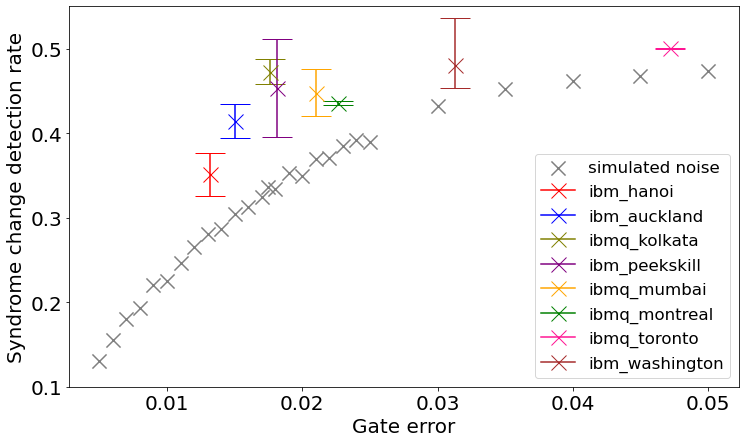

In [10]:
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 20})

plt.xlabel('Gate error')
plt.ylabel('Syndrome change detection rate')

color = {'ibm_hanoi':'red', 'ibm_auckland':'blue', 'ibmq_kolkata':'olive','ibm_peekskill':'purple', 'ibmq_mumbai':'orange', 'ibmq_montreal':'green', 'ibmq_brooklyn':'steelblue', 'ibmq_toronto':'deeppink', 'ibm_washington':'brown'}

# plot sim results    
probs = []
ws = []
for prob,w in sim_results.items():
    if prob<=0.05:
        probs.append(prob)
        ws.append(w)
plt.scatter(probs,ws,s=200,marker='x',c='grey',label='simulated noise')

for archive_id, p_0, bot, mid, top in q_results:
    backend_name = archive_id.split('@')[1]
    plt.errorbar([p_0],[mid],yerr=[[top-mid],[mid-bot]],marker='x',ms=15,capsize=15,label=backend_name,color=color[backend_name])
    
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, fontsize='small')
archive_id.split('@')[1]
ax.set_ylim([0.1,0.55])
    
plt.savefig('results.png')

In [11]:
for archive_id in archive_ids:
    probs_meas, probs_prep, probs_cx, probs_idle, p_0, p_0_std = noise_details(archive_id)
    print(archive_id.split('@')[1],p_0,p_0_std)

ibm_hanoi 0.013169214543115907 0.013863675570928888
ibm_auckland 0.015002898871452085 0.01708875386567394
ibmq_kolkata 0.017622582074104626 0.03142695063207111
ibm_peekskill 0.01813233897779295 0.023657714914274035
ibmq_mumbai 0.020977907731794754 0.017274746244714683
ibmq_montreal 0.022604322892445496 0.02089376289265039
ibmq_toronto 0.047160876763930236 0.06367053574287883
ibm_washington 0.03129907655675087 0.05386378873611016
